# Transform business issue to data problem

## Business issue and our data approach

   Opioid medicine is used by many patients today. However, overuse of opioid medicine can be harmful to patients. LTOT is defined as a continuous use of an opioid medicine with 90% days over a 6 month period. Opioid Naive is defined as not having an opioid on hand in the preceding 90-day period. We want to construct a model for Humana to predict whether a patient will be in LTOT state from Opioid Naive state so that Humana can provide early intervention to prevent patients from abusing opioid medicine.

   Basically, we want to select useful variables from a patients history before the first qualifying claim as our estimators to predict whether a patient will be in LTOT state in the future. 
   We first need to separate dataset. For each patient, we separate the information using day 0, the anchor date. We use information after day 0 to identify whether a patient is LTOT or not. For information before day 0, we need to clean and wrangler data to have a tidy dataset and select those columns which we think might be helpful. Then, we use several methods to cut down the size of our estimators. Finally, with the estimators we select, we conduct different models to choose the best one based on metrics such as confusion matrix, RMSE, and ROC curves.
   After selecting our dataset, we will wrangler data in holdout file and have a score for each individual patient.

## Brief summary of data cleaning

   We clean the data a little so that now we have 13,900 patients instead of 14,000. After receiving the data, we separate the data so that only rows with 'Days' <= 0 are used for prediction. We analyze patients' behavior using python for those rows after day 0 and identify there are about 6,576 patients who are qualified for LTOT. 

   Initially, we have over 2 million rows covering the patients information with 'Days' <= 0. After organizing the data, we now have 13,900 rows and 24 columns with each row represent a individual patient and each column represents one aspect of patient's historical information. One our of 24 columns is target variable with 1 represents patients who are identified as LTOT. Other than that, we have 6 numerical variables and 17 categorical variables. We already transform values in our categorical columns with 1 and 0. 

    Dictionary for each column
    
    Categorical columns:
    diabete-whether or not a patient had diabete
    surgery-whether or not a patient had surgery
    cad-whether or not a patient had cad
    cpd-whether or not a patient had cpd
    hyper-whether or not a patient had hypertension
    fp-patient used opioid medicine mainly as family practice
    internal-patient used opioid medicine mainly as internal
    emergency-patient used opioid medicine mainly as family emergency
    Anesthesiology-patient used opioid medicine mainly as Anesthesiology
    Orthopaedic-patient used opioid medicine mainly as Orthopaedic
    NursePractitioner-patient used opioid medicine mainly as NursePractitioner
    Physician_Assistant-patient used opioid medicine mainly as Physician_Assistant
    physical-patient used opioid medicine mainly as physical
    hospitalist-patient used opioid medicine mainly as hospitalist
    Numerical columns:
    charge_amt_t-total amount of money charged before day 0
    net_paid_t-total amount of net_paid before day 0
    charge_amt-total amount of money charged for opioid medicine before day 0
    net_paid-total amount of net_paid for opioid medicine before day 0
    member_paid-total amount of member paid for opioid medicine before day 0
    firstday-number of days the opioid medicine given on day 0

## Import dataset

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('firstday.csv')

# Select variables

## Random Forest

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#We need to cut down our estimators first
#First use random forest to check the importance of variables
#Take a sample of 800 patients to run random forest

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [9]:
sample=data.sample(n=800)

In [10]:
X=sample.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23]]
y=sample.iloc[:,22]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.2)

In [12]:
label=['diabete', 'surgery', 'cad', 'cpd', 'hyper', 'charge_amt_t',
       'net_paid_t', 'charge_amt', 'net_paid', 'member_paid', 'fp', 'internal',
       'Emergency', 'Anesthesiology', 'Orthopaedic', 'NursePractitioner',
       'Physician_Assistant', 'dentist', 'physical', 'hospitalist','firstday']

In [13]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)


for feature in zip(label, clf.feature_importances_):
    print(feature)
    
#Some variables are more important than others
#Basically all numerical variables are important(have high scores)

('diabete', 0.009528021014070518)
('surgery', 0.01790600117140699)
('cad', 0.012006360541872008)
('cpd', 0.015052182133725998)
('hyper', 0.012386207171616741)
('charge_amt_t', 0.13947521150810455)
('net_paid_t', 0.14168123188789988)
('charge_amt', 0.11510601156788448)
('net_paid', 0.07958241781247428)
('member_paid', 0.1275288828350911)
('fp', 0.01599748667847088)
('internal', 0.011418039559006003)
('Emergency', 0.0055737856295998344)
('Anesthesiology', 0.009681774796328344)
('Orthopaedic', 0.003841874845330755)
('NursePractitioner', 0.0050562901000453355)
('Physician_Assistant', 0.003816167208765242)
('dentist', 0.0028239391231494712)
('physical', 0.004083799413374134)
('hospitalist', 0.0020205644033371743)
('firstday', 0.2654337505984473)


## Decision Tree with Grid Search

In [14]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [15]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
parameters={'max_depth': range(1,20,2)}
grid = GridSearchCV(clf, parameters,cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

NameError: name 'tree' is not defined

In [ ]:
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''



print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(X_test)))

#We can see that the best max depth is 3
#The model does not need many variables
#Accuracy is 0.85, which is very high

## Confusion Matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X, y)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=label,
                                class_names=['non_opioid','opioid']
                                ) 

In [ ]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  
import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
Image(graph.create_png())
#Only five variables involved here, all numerical variables

## Forward Selection with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build RF classifier to use in feature selection
clf = LogisticRegression(C=1e5)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=True, # Otherwise, this will be the backward selection 
           floating=False,
           n_jobs=10, # The number of CPUs to use for evaluating 
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

#We see that accuracy score starts to decrease when there are over 6 variables.
#Six features are enough for our prediction

## Conclusion

   As we can see above, numerical variables are much more important than others. We should only select maximum of 6 variables when we construct model in the next section. Hence, we should construct a model only based on our numerical variables.

# Construct Models

## Split dataset

In [16]:
#Select all numerical variables, construct model using all 13900 patients


#Numerical columns:
#charge_amt_t-total amount of money charged before day 0
#net_paid_t-total amount of net_paid before day 0
#charge_amt-total amount of money charged for opioid medicine before day 0
#net_paid-total amount of net_paid for opioid medicine before day 0
#member_paid-total amount of member paid for opioid medicine before day 0
#firstday-number of days the opioid medicine given on day 0

In [17]:
X=data.iloc[:,[7,8,9,10,11,23]]
y=data.iloc[:,22]

In [18]:
X.head()
#X variables we have now

,charge_amt_t,net_paid_t,charge_amt,net_paid,member_paid,first_day
0,11646.82,2500.49,999.92,183.60,839.82,30
1,6110.88,954.32,0.00,0.00,0.00,30
2,3324.81,1830.61,0.00,0.00,0.00,3
3,21787.11,4685.29,0.00,0.00,0.00,3
4,4953.21,2960.53,611.38,146.16,472.77,30


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.2)

## Decision Tree with Grid Search

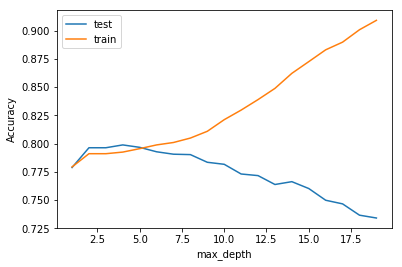

In [20]:
from sklearn import tree
complexity_values = range(1,20)
train_accuracies = []
test_accuracies=[]
# Set up possible values of parameters to optimize over
for complexity_value in complexity_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
    test_accuracies.append(clf.fit(X_train, y_train).score(X_test, y_test))
    train_accuracies.append(clf.fit(X_train, y_train).score(X_train, y_train))
    
line1, =plt.plot(complexity_values, test_accuracies,label='test_accuracies')
line2, =plt.plot(complexity_values, train_accuracies,label='train_accuracies')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend((line1, line2), ('test', 'train'))
plt.show()


In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=complexity_value)
parameters={'max_depth': range(1,20,2)}
grid = GridSearchCV(clf, parameters,cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [22]:
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''



print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

print("Prediction Accuracy: ",accuracy_score(y_test, grid.predict(X_test)))

0.7905646890636169
{'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Prediction Accuracy:  0.7962830593280915


### Confusion Matrix

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X, y)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#We can see our model can predict both LTOT and non-LTOT pretty well
#F1-scores for class 0(non-LTOT) is 0.8 and for class1(LTOT) is 0.79

[[1137  313]
 [ 253 1095]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1450
           1       0.78      0.81      0.79      1348

   micro avg       0.80      0.80      0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



### Decision Tree Visulization

In [53]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=[ 'charge_amt_t',
       'net_paid_t', 'charge_amt', 'net_paid', 'member_paid','firstday'],
                                class_names=['non_opioid','opioid']
                                ) 

In [54]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  
import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

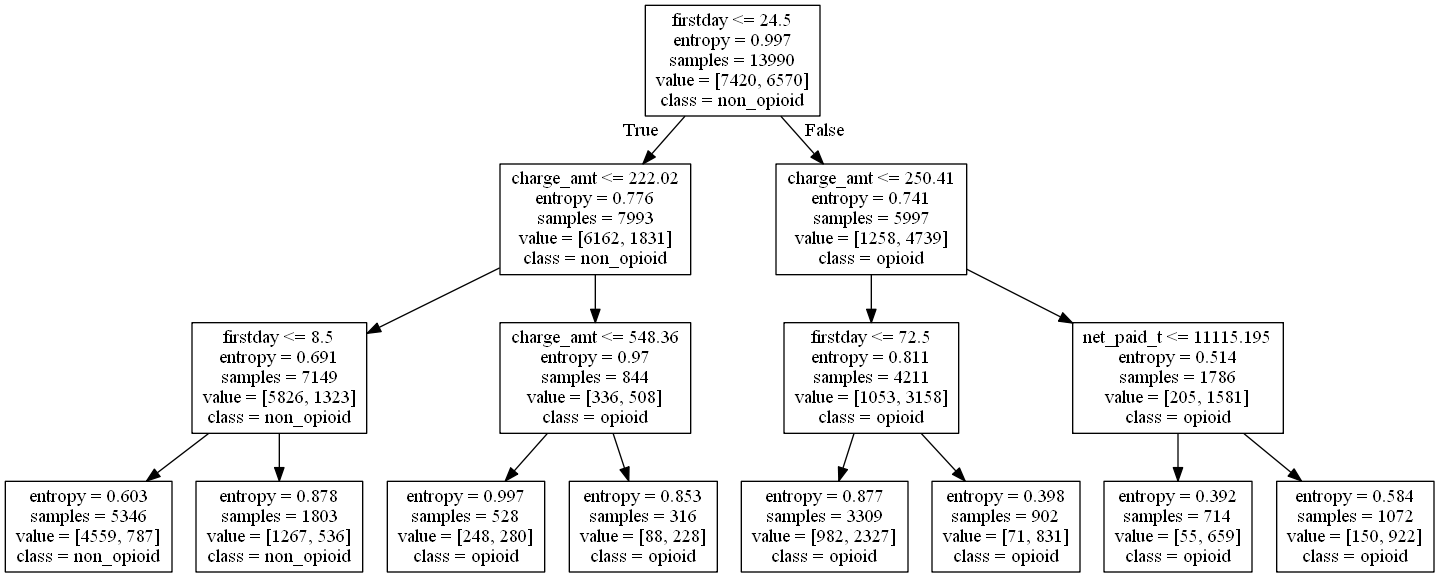

In [57]:
Image(graph.create_png())

### ROC Curve

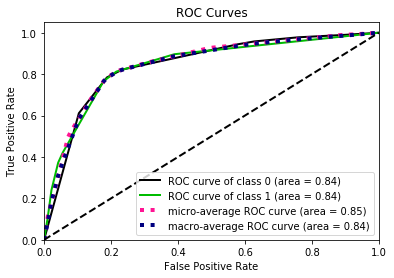

In [24]:
from sklearn import metrics
import scikitplot as skplt
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
skplt.metrics.plot_roc(y_test, probs)
plt.show()

#We have a AUC of 0.84 for both classes, which indicates a good model

## Gradient Boosting

In [219]:
%matplotlib inline
X_train=X_train.iloc[:, feat_cols]
X_test=X_test.iloc[:, feat_cols]

#Use the features selected before


print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

MSE: 0.1556


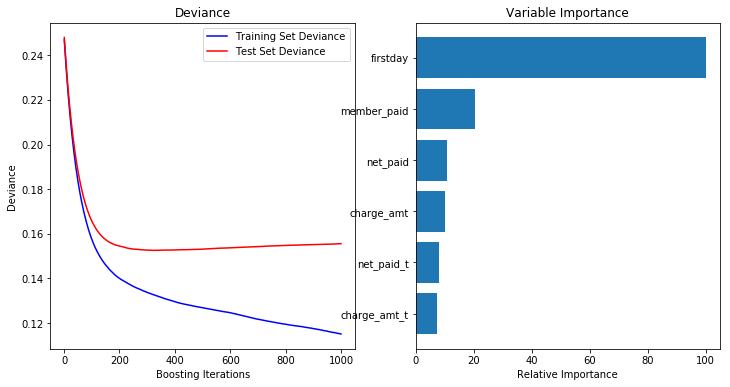

In [60]:
print(__doc__)



import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, [ 'charge_amt_t',
       'net_paid_t', 'charge_amt', 'net_paid', 'member_paid','firstday'])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#We checked the model with all 23 variables, RMSE is over 0.2
#With only 6 features, RMSE dropped down to 0.1556. 
#Again, six variables are enough for our modeling here
#Firstday is the most important variable in our model from plot at right. 

In [61]:
clf.predict(X_test)

array([0.68420527, 0.91911044, 0.23140631, ..., 0.11653091, 0.85907147,
       0.32342865])

## Random Forest

In [25]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1,max_depth=3)

In [26]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Random Forest is slightly better than decision tree
#F1-score increased by 0.01 for class1(LTOT)

[[1143  307]
 [ 255 1093]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1450
           1       0.78      0.81      0.80      1348

   micro avg       0.80      0.80      0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



In [28]:
clf.predict_proba(X_test)

array([[0.27954588, 0.72045412],
       [0.36179772, 0.63820228],
       [0.72456511, 0.27543489],
       ...,
       [0.79617925, 0.20382075],
       [0.17225924, 0.82774076],
       [0.59125399, 0.40874601]])

In [14]:
clf.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

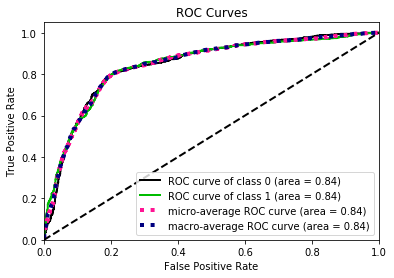

In [65]:
from sklearn import metrics
import scikitplot as skplt
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
skplt.metrics.plot_roc(y_test, probs)
plt.show()
#Based on ROC Curves and Confusion matrix, random forest has the best prediction.

C:\Games\anaconoda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


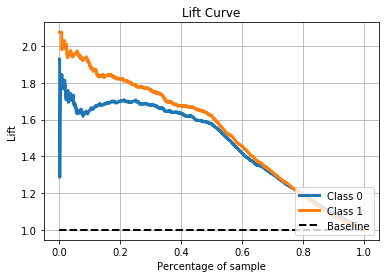

In [66]:
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=probs)
plt.show()
#When predicting class1(LTOT), our model has a lift over 2
#The model has a lift of over 2 compared to random guessing!

## Conclusion

   After tailoring our variables, we decide to do modeling with all 13900 patients we have and only 6 variables, which are all numerical variables. We illustrated decision tree, gradient boosting, and random forest models above and results showed that random forest is the best model we have. We also made KNN and logistic models but their results are much worse than what we have so far. Hence, we will use random forest as our model to predict LTOT.

# Predict Holdout FIle

In [29]:
holdout=pd.read_csv('holdout.csv')

In [30]:
X=holdout.iloc[:,2:]

In [38]:
X.tail()

,charge_amt_t,net_paid_t,charge_amt,net_paid,member_paid,firstday
5995,156906.12,48379.83,394.60,213.72,180.88,30
5996,100985.96,33320.82,1022.00,883.95,169.25,30
5997,11673.26,7993.33,102.00,102.00,1.42,10
5998,75191.84,20492.57,283.48,165.98,120.06,90
5999,825.59,480.89,237.77,217.41,21.64,30


In [76]:
clf.predict(X)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
result=clf.predict_proba(X)

In [33]:
result[1]

array([0.64263427, 0.35736573])

In [34]:
def get(n):
    lst=[]
    i=0 
    while i<len(n):
        lst.append(n[i][1])
        i+=1
    return lst

In [35]:
positive=get(result)

In [36]:
len(positive)

6000

In [37]:
print(positive)

[0.7279421336872874, 0.35736572775822445, 0.24370384780156878, 0.7963457188794322, 0.6934289641965574, 0.24423686391869281, 0.8415158986331062, 0.8265274475731113, 0.5198720212432503, 0.5302194176065168, 0.7119676669815322, 0.6995492406556097, 0.45179753737744377, 0.24025302644835228, 0.606042638142052, 0.257306532553912, 0.8301858684631265, 0.5212436210196348, 0.6667847522097718, 0.6491692174338024, 0.6752768360673972, 0.6379384340162568, 0.30292362964645086, 0.8265999966213007, 0.25582282858911937, 0.3774807631763547, 0.6691997265441241, 0.24164087907877105, 0.2506753550531429, 0.6830182078673236, 0.24618595798935386, 0.3764345976839323, 0.8200550015306797, 0.7822154165233355, 0.6592165488266332, 0.24309665399105365, 0.237794945807136, 0.27547443897844426, 0.24199610086001344, 0.24050163767061486, 0.23955592202133663, 0.2445625432272955, 0.21453678083711808, 0.40920097979166103, 0.38790002618790237, 0.7617445336762245, 0.24454706291966508, 0.2901322638178852, 0.42804540478791314, 0.8